<a href="https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/Pr%C3%A9_processamentos%2C_M%C3%A9tricas_e_Pipelines_(Pr%C3%A1tica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-Processamento de dados
---


[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-purple.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-yellow.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-darkblue.svg)](https://daniel-s-amador.medium.com/)




Quem trabalha como **Cientista de Dados**, 70% a 80% do seu tempo de analise é com essa parte menos glamurosa.


Esta parte do trabalho envolve **preparação**, **manipulação**, **limpeza**, **organização** e **estruturação** dos dados e serve para diversos fins, desde transformar os dados para utilizar um modelo que só aceita dados normalizados, como transformar dados categóricos (palavras e frases) em numéricos para utilizar modelos que usam cálculos matemáticos e de distância. 

Logo, é de se imaginar que esta etapa antecede a realização de análises e predições. 

Essa fase é de tamanha importância que influenciará diretamente a qualidade final do seu modelo.

![manipulação](https://image.freepik.com/fotos-gratis/processando-fireclay_1098-13070.jpg)

Vamos tratar um a um dentro do seu escopo e ao final vamos falar de **Pipelines**! Essa parte muito importante de um trabalho de **Machine Learning** vai, com certeza, automatizar essa parte do seu trabalho!

## Checklist

1. Detecção e remoção de valores anômalos
2. Discretização ou Binarização
3. Normalização
4. Padronização com MinMaxScaler
5. Padronização com StandardScaler
6. Aplicando a padronização a dados reais
7. Métricas de Desempenho
8. One Hot Enconding, Label Encoder e Get Dummies
9. Pipelines

# 1. Detecção e remoção de valores anômalos

**O que são valores anômalos**? 

Valores em sua base de dados que fogem do comum.
* Exemplo: Considere um restaurante que vende durante todo o mês **dois mil reais diários** no máximo, por dia concorda que se, em um dia exclusivo, por exemplo, numa promoção, vendeu **quatro mil reais**, isso é **anômalo**?!
* Esse valor **anômalo** serve para análise de dados, por exemplo, para tentar entender o motivo de um dado anômalo ter aparecido e, se possível, replicá-lo, mas em um modelo de Machine Learning isso atrapalhará, normalmente.

**Criando dados**

In [ ]:
import numpy

dados = [10, 386, 479, 627, 20, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 
       453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 
       440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 
       512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 
       689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543,30, 1300, 1350, 1400]

dados = numpy.array(dados)
print(dados)

[  10  386  479  627   20  523  482  483  542  699  535  617  577  471
  615  583  441  562  563  527  453  530  433  541  585  704  443  569
  430  637  331  511  552  496  484  566  554  472  335  440  579  341
  545  615  548  604  439  556  442  461  624  611  444  578  405  487
  490  496  398  512  422  455  449  432  607  679  434  597  639  565
  415  486  668  414  665  763  557  304  404  454  689  610  483  441
  657  590  492  476  437  483  529  363  711  543   30 1300 1350 1400]


In [ ]:
type(dados)

numpy.ndarray

**Veja no gráfico abaixo:**

Os pontos acima e abaixo do **boxplot** são dados anômalos

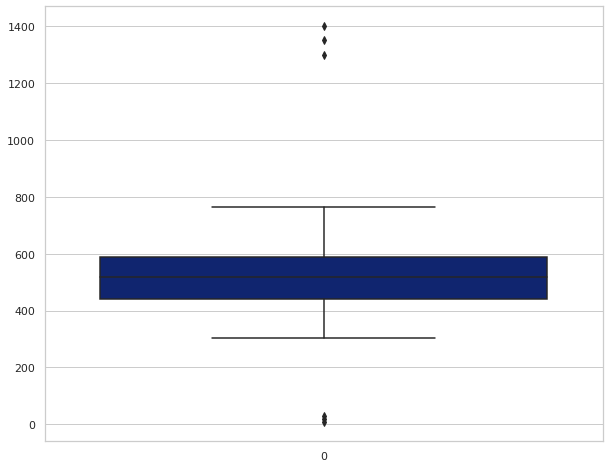

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid',palette='dark',color_codes=True)
plt.figure(figsize=(10,8))
sns.boxplot(data=dados);

**Vamos ver:**
* A **Média** dos dados: 530.36
* O **Desvio Padrão** dos dados: 192.51
    * Isso significa que, em média, os dados variam entre 338.09 e 723,11.

In [ ]:
# média
dados.mean()

530.3673469387755

In [ ]:
# desvio padrão
dados.std()

192.51166875607043

**Atribuindo a média e o desvio padrão a variáveis**

In [ ]:
mean = numpy.mean(dados, axis=0) # ou dados.mean()
sd = numpy.std(dados, axis=0) # ou dados.std()

**Vamos estabelecer dois limites:**
* **Inferior**: Média menos 2 vezes o desvio padrão
* **Superior**: Média mais 2 vezes o desvio padrão

In [ ]:
# fronteira de valores abaixo da média em duas vezes o desvio padrão
mean - 2 * sd

145.34400942663467

In [ ]:
# fronteira de valores aacima da média em duas vezes o desvio padrão
mean + 2 * sd

915.3906844509164

**Criando função para retornar os dados anômalos**

In [ ]:
# listando os valores abaixo da média em duas vezes o desvio padrão (inferior)
for x in dados:
        if (x < mean - 2 * sd):
            print(x)

10
20
30


In [ ]:
# listando os valores acima da média em duas vezes o desvio padrão (superior)
for x in dados:
        if (x > mean + 2 * sd):
            print(x)

1300
1350
1400


**Removendo os valores**

In [ ]:
# removendo os valores muito abaixo da média (10,20,30)
dados = [x for x in dados if (x > mean - 2 * sd)]
print(dados)

[386, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543, 1300, 1350, 1400]


In [ ]:
# removendo os valores muito acima da média (1300,1350,1400)
dados = [x for x in dados if (x < mean + 2 * sd)]
print(dados)


[386, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543]


**Vamos plotar novamente o *Boxplot* e visualizar que foram removidos os valores *anômalos***

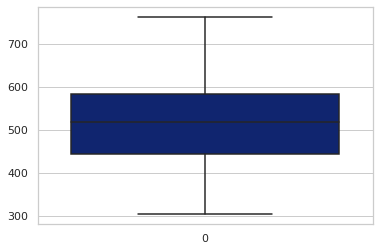

In [ ]:
sns.boxplot(data=dados);

# 2. Discretização ou Binarização

Ao passo que alguns algoritmos somente trabalham com dados numéricos, outros só trabalham com dados **nominais** e até mesmo algoritmos como as *Árvores de Decisão* consigam trabalhar com dados numéricos, se torna mais custoso trabalhar com eles, o que pode ser facilitado tranformando alguns dados em **intervalos distintos**, ou, seja, definir alguns grupos.

No exemplo abaixo temos 6 dados para discretizar.

Na função altura = pd.qcut(altura,3,labels=['P','M','G']), ao passar o **valor 3** e nome as **labels** (colunas), estamos dizendo que divida os dados em 3 grupos diferentes e que esses serão os nomes dos grupos.


**Importando o pandas**

O método **qcut** é quem faz a função de discretização baseada em quantis.

In [ ]:
import pandas as pd

**Dados para discretizar**

In [ ]:
altura = [1.50,1.57,1.62,1.70,1.85,1.90]

**Aplicando em 3 bins ou grupos aos dados**

In [ ]:
altura = pd.qcut(altura,3,labels=['P','M','G'])

**Verificando os dados discretizados**

Veja que foi criado um padrão bem fiel

In [ ]:
altura

[P, P, M, M, G, G]
Categories (3, object): [P < M < G]

**Verificando valores**

In [ ]:
altura.value_counts()

P    2
M    2
G    2
dtype: int64

**Criando novos valores**

Perceba que o alagoritmo não faz uma transformação cega, nos dados abaixo as alturas **1.85** e **1.90** estão no meio dos dados e, mesmo assim foram transformados em **G**, ou seja, grande.

In [ ]:
novas_alturas=[1.50,1.57,1.62,1.70,1.85,1.90,1.40,1.70,1.30,2.00,2.10]

**Passando a mesma quantidade de bins**

In [ ]:
novas_alturas_disc1=pd.qcut(novas_alturas,3,labels=['P','M','G'])

**Visualizando as novas discretizações**

In [ ]:
novas_alturas_disc1

[P, P, M, M, G, ..., P, M, P, G, G]
Length: 11
Categories (3, object): [P < M < G]

**Contando os valores**

In [ ]:
novas_alturas_disc1.value_counts()

P    4
M    3
G    4
dtype: int64

**Agora vamos discretizar os mesmos dados, mas passando 4 bins**

In [ ]:
novas_alturas_disc2=pd.qcut(novas_alturas,4,labels=['P','M','G','GG'])

**Perceba!**

As alturas finais **2.00** e **2.10.** agora já são consideradas **GG**, não mais **G**.

In [ ]:
novas_alturas_disc2

[P, M, M, M, G, ..., P, M, P, GG, GG]
Length: 11
Categories (4, object): [P < M < G < GG]

**Contagem os resultados**

Veja que temos 3 valores **GG** e 1 valor **G**, ou seja, a partir de **1.90** foi considerado **GG**.

In [ ]:
novas_alturas_disc2.value_counts()

P     3
M     4
G     1
GG    3
dtype: int64

**Visualizando tipo dos dados**

In [ ]:
type(novas_alturas_disc2)

pandas.core.arrays.categorical.Categorical

**Abaixo:**
* Vamos criar um **Pandas DataFrame** vazio
* Atribuindo os **valores numéricos** como a coluna **num**
* Atribuindo os **valores discretizados** como a coluna **disc**
* Visualizando os valores lado a lado

In [ ]:
# pandas DataFrame vazio
df=pd.DataFrame()

In [ ]:
# valores numéricos como a coluna num
df['num']=novas_alturas

In [ ]:
# valores discretizados como a coluna disc
df['disc']=novas_alturas_disc2

In [ ]:
# visualização dos valores lado a lado
df

,num,disc
0,1.50,P
1,1.57,M
2,1.62,M
3,1.70,M
4,1.85,G
5,1.90,GG
6,1.40,P
7,1.70,M
8,1.30,P
9,2.00,GG


**Para finalizar vamos fazer com 5 bins**

In [ ]:
novas_alturas_disc3=pd.qcut(novas_alturas,5,labels=['PP','P','M','G','GG'])

**Visualizando os valores**

In [ ]:
novas_alturas_disc3

[PP, P, P, M, G, ..., PP, M, PP, GG, GG]
Length: 11
Categories (5, object): [PP < P < M < G < GG]

**Contando os valores**

In [ ]:
novas_alturas_disc3.value_counts()

PP    3
P     2
M     2
G     2
GG    2
dtype: int64

**Visualizando em formato DataFrame**

Veja que os valores abaixo de **1.50** foram classificados com **PP**

In [ ]:
df2=pd.DataFrame()
df2['num']=novas_alturas
df2['disc']=novas_alturas_disc3
df2

,num,disc
0,1.50,PP
1,1.57,P
2,1.62,P
3,1.70,M
4,1.85,G
5,1.90,G
6,1.40,PP
7,1.70,M
8,1.30,PP
9,2.00,GG


## Que tal discretizar uma base de dados real?

**Carregando base de dados**

In [ ]:
bd=pd.read_csv('/home/amador/dados/kc_house_data.csv')

In [ ]:
bd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**Contando o número de pisos**

In [ ]:
bd['floors'].value_counts()

1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

**Discretizando a coluna *floors***

Embora sejam 6 categorias, estão sendo usados 5 bins, logo ficarão com resultados diferentes

In [ ]:
bd['floors_labels'] = pd.cut(
    bd['floors'],
    5,
    labels=['Muito-Pequeno','Pequeno','Medio','Grande','Muito-Grande']
)

**Contando os valores**

Veja que os com valores *1.0* e *1.5* foram classificados como *Muito-Pequeno*.

In [ ]:
bd['floors_labels'].value_counts()

Muito-Pequeno    12589
Pequeno           8241
Grande             613
Medio              161
Muito-Grande         8
Name: floors_labels, dtype: int64

**Valores únicos**

In [ ]:
bd['floors_labels'].unique()

[Muito-Pequeno, Pequeno, NaN, Grande, Medio, Muito-Grande]
Categories (5, object): [Muito-Pequeno < Pequeno < Medio < Grande < Muito-Grande]

# 3. Normalização

Deixa os valores mais próximos da normal, ou seja, assume que os valores estejam cada vez mais próximos da média

Altera a distribuição dos dados

É **importante** falar que há várias formas de se normalizar, por exemplo, no caso abaixo pode-se tirar a média de `Idade` e a de `Renda` e dividir o dado de cada *feature* pela média respectiva.

Por que se faz necessário?
* Imagine que será feita uma modelagem onde vai ser utilizada uma regressão linear.
* Se você tem duas variáveis: `Idade` e `Renda`
    * A **Idade** terá valores como, 1, 10, 15, 70 e 100
    * **Renda** tem valores muito maiores como **1.000**, **5.000**, **50.000** 
* Com essa discrepância, os valores de renda influenciarão muito no final do modelo, então a **normalização** deixará todos os dados na mesma faixa de valores.
* O **Normalizer** da **sklearn.preprocessing** faz a **reescala por linha** e não por coluna, diferente dos outros que veremos mais à frente, logo no exemplo acima, ele utilizará os atributos **Idade** e **Renda** em conjunto para a reescala.

Se a distribuição *não é Gaussiana* (normal) ou o *desvio padrão é muito pequeno*, pense em normalizar os dados.

O padrão utilizado pela **sklearn.preprocessing** é a **norma euclidiana** que também é chamada de **norma L2** ou **norma quadrada**, mas pode ser utilizada também as **L1** e **Max**.

Retirado direto do [Kaggle](https://www.kaggle.com/residentmario/l1-norms-versus-l2-norms), vamos falar rapidamente sobre as qualidades da L1 e L2:

* **L1 é mais robusta que a L2**:
    * Robustez é a resistência a outliers em um conjunto de dados.
    * Por razões bastante óbvias, a norma L2 enquadra os valores, portanto aumenta exponencialmente o custo dos valores extremos; a norma L1 leva apenas o valor absoluto, portanto os considera linearmente.
* **L2 é mais estável que a L1**:
    *  É a resistência a ajustes horizontais. Sendo o oposto perpendicular à robustez.
* **L1 tem mais soluções que L2**: 
    * L2 é a distância euclidiana, sempre há uma resposta certa para obter entre dois pontos mais rapidamente, já L1 é como estar em um carro, há várias formas de chegar ao mesmo lugar.  

**Importando bibliotecas**

In [ ]:
from sklearn.preprocessing import Normalizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Dados de exemplo**

In [ ]:
data = [
    [-1, 2],
    [0.5, 6],
    [0, 10],
    [1, 18]
]
print (data)

[[-1, 2], [0.5, 6], [0, 10], [1, 18]]


**Veja qual a média dos dados atualmente**

In [ ]:
np.mean(data)

4.5625

**Veja a distribuição atual**

Veja que os dados têm uma distribuição **assimétrica à direita** ou **positiva**, ou seja, se você dividir os dados ao meio, ambos os lados não estarão iguais e **concentração dos dados** está no lado **direito**.

Importante saber que nessa distribuição:

$Média>Mediana>Moda$

Numa **distribuição normal** os valores acima **são todos os iguais** e numa **assimétrica à esquerda** exatamente ao contrário.



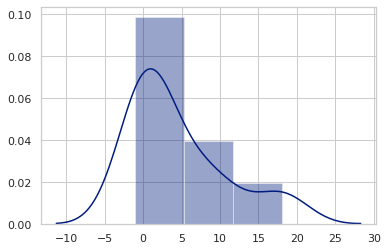

In [ ]:
sns.distplot(np.array(data).reshape(-1))
plt.show()

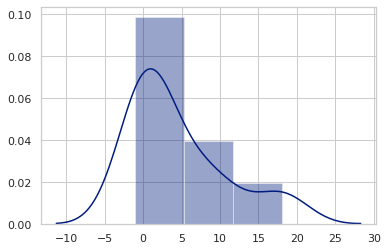

In [ ]:
sns.distplot(data);

**Criação do objeto Normalizador**

In [ ]:
normalizer = Normalizer().fit(data)

**Normalizando os dados**

O objeto irá tentar manter os valores entre **-1** e **1**

Lembre do que foi dito acima! A **distribuição foi alterada**!

In [ ]:
data2 = normalizer.transform(data)
print(data2)

[[-0.4472136   0.89442719]
 [ 0.08304548  0.99654576]
 [ 0.          1.        ]
 [ 0.05547002  0.99846035]]


**Alterando dados para apenas uma dimensão**

In [ ]:
data2 = data2.reshape(-1)
print(data2)

[-0.4472136   0.89442719  0.08304548  0.99654576  0.          1.
  0.05547002  0.99846035]


**Veja**!
A média que antes era de **4.5625**, agora é **0.4476**

In [ ]:
np.mean(data2).round(4)

0.4476

**A distribuição agora está na normal**

É __importante__ que você saiba que não é sempre que será utilizada esse técnica, normalmente é quando valores numéricos estão em escalas diferentes e quando o **modelo** utiliza distâncias entre eles, por exemplo, e/ou quando é necessário que os dados estejam na **distribuição normal**.

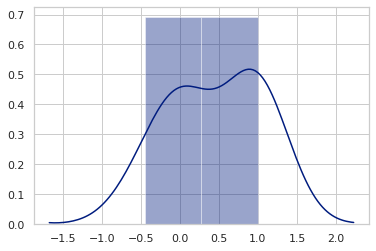

In [ ]:
sns.distplot(data2);

# 4.  Padronização com MinMaxScaler

A **Padronização** é também chamada de **Standartization** ou **Z-Score**

Subtrai os dados pela média e divide pelo desvio padrão, por isso deixa mais próximo da normal.

**z=dados-média/desvio padrão**

Não altera a distribuição dos dados, apenas os reescala.

É muito comum utilizar em algoritmos que trabalham com distância.

Os valores ficam entre 0 e 1.


Essa técnica coloca os **valores entre 0 e 1**

**Não altera a distribuição** dos dados!

In [ ]:
data = np.random.normal(size = 50)
print(data)

[ 1.17761699 -2.43240959 -1.03377036 -0.03197756  0.65358513  0.09914483
 -2.04683284 -1.0364588   0.10880776 -0.19420798  1.65438436  1.65993223
 -0.62731901 -0.63254841 -0.12098062  0.36992701 -0.70771351 -0.6217631
  0.99907463  1.10144814  0.52507224  1.96907865 -0.26430269 -0.43977742
 -1.93456621  0.15680849  1.13221162 -0.70706985 -1.29683562 -0.12469206
 -1.00040706 -1.97692106  0.17454895  0.55734898  0.88021021  1.4093558
 -0.03767111 -0.83239695  0.84304461  1.32711658 -0.76845731 -1.27171067
  0.59081251  0.56455827 -0.33242962  2.80871789 -0.83284741 -0.20255503
 -1.54540998  0.7381973 ]


**Colocando os dados na dimensão 1x1**

In [ ]:
data = data.reshape(-1,1)
data

array([[ 1.17761699],
       [-2.43240959],
       [-1.03377036],
       [-0.03197756],
       [ 0.65358513],
       [ 0.09914483],
       [-2.04683284],
       [-1.0364588 ],
       [ 0.10880776],
       [-0.19420798],
       [ 1.65438436],
       [ 1.65993223],
       [-0.62731901],
       [-0.63254841],
       [-0.12098062],
       [ 0.36992701],
       [-0.70771351],
       [-0.6217631 ],
       [ 0.99907463],
       [ 1.10144814],
       [ 0.52507224],
       [ 1.96907865],
       [-0.26430269],
       [-0.43977742],
       [-1.93456621],
       [ 0.15680849],
       [ 1.13221162],
       [-0.70706985],
       [-1.29683562],
       [-0.12469206],
       [-1.00040706],
       [-1.97692106],
       [ 0.17454895],
       [ 0.55734898],
       [ 0.88021021],
       [ 1.4093558 ],
       [-0.03767111],
       [-0.83239695],
       [ 0.84304461],
       [ 1.32711658],
       [-0.76845731],
       [-1.27171067],
       [ 0.59081251],
       [ 0.56455827],
       [-0.33242962],
       [ 2

**Visualizando os dados atuais**

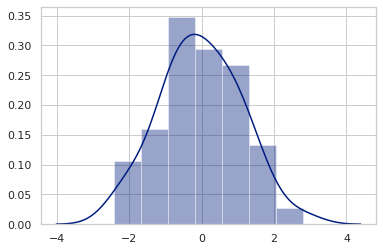

In [ ]:
sns.distplot(data);

**Criando objeto standartization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(data)

**Transformando os dados**

In [ ]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[0.68878817]
 [0.        ]
 [0.26685846]
 [0.45799917]
 [0.5888036 ]
 [0.48301714]
 [0.07356752]
 [0.26634551]
 [0.48486082]
 [0.42704583]
 [0.77975473]
 [0.78081326]
 [0.34440883]
 [0.34341107]
 [0.44101751]
 [0.53468202]
 [0.32906967]
 [0.34546889]
 [0.65472253]
 [0.67425525]
 [0.56428351]
 [0.83979797]
 [0.41367185]
 [0.38019151]
 [0.09498784]
 [0.49401929]
 [0.68012488]
 [0.32919248]
 [0.21666597]
 [0.44030937]
 [0.27322414]
 [0.08690659]
 [0.49740415]
 [0.57044187]
 [0.63204336]
 [0.73300362]
 [0.45691285]
 [0.30528024]
 [0.62495221]
 [0.71731248]
 [0.31747983]
 [0.22145978]
 [0.57682667]
 [0.57181739]
 [0.40067332]
 [1.        ]
 [0.30519429]
 [0.42545322]
 [0.16923832]
 [0.60494749]]


**Reshape dos dados**

In [ ]:
data_scaled = data_scaled.reshape(-1,1)
data_scaled

array([[0.68878817],
       [0.        ],
       [0.26685846],
       [0.45799917],
       [0.5888036 ],
       [0.48301714],
       [0.07356752],
       [0.26634551],
       [0.48486082],
       [0.42704583],
       [0.77975473],
       [0.78081326],
       [0.34440883],
       [0.34341107],
       [0.44101751],
       [0.53468202],
       [0.32906967],
       [0.34546889],
       [0.65472253],
       [0.67425525],
       [0.56428351],
       [0.83979797],
       [0.41367185],
       [0.38019151],
       [0.09498784],
       [0.49401929],
       [0.68012488],
       [0.32919248],
       [0.21666597],
       [0.44030937],
       [0.27322414],
       [0.08690659],
       [0.49740415],
       [0.57044187],
       [0.63204336],
       [0.73300362],
       [0.45691285],
       [0.30528024],
       [0.62495221],
       [0.71731248],
       [0.31747983],
       [0.22145978],
       [0.57682667],
       [0.57181739],
       [0.40067332],
       [1.        ],
       [0.30519429],
       [0.425

**Visualizando a distribuição dos dados reescalados**

Veja que a única coisa que alterou foi a escala dos dados e que ficou entre 0 e 1.

A distribuição ainda é a mesma.

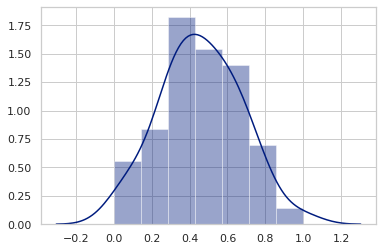

In [ ]:
sns.distplot(data_scaled);

# 5. Padronização com StandardScaler 

**Igual ao standartization com MinMaxScaler** porém é **mais suave**, não limitando em  0 a 1.

Padroniza também sem alterar a forma dos dados.

Tenta deixar o mais próximo da normal possivel.

Se os dados já estiverem na normal, ao padronizar se terá desvio padrão 0 e média 1.

**Criando dados**

In [ ]:
data = np.random.normal(size = 50)
print(data)

[ 0.06483081  0.89997452  0.24872491 -0.15129613 -0.04337781  1.6922801
  0.68062985  0.74777868  0.94248785  0.2712751   0.64261509 -1.24717058
 -0.4593563  -0.33733619  1.7430821  -2.79105253  0.23396473  0.50548668
 -0.11931949  1.10585992 -0.49254643 -0.62632603  0.14216526 -0.15804428
  0.29582654  0.66144059  0.6297181  -0.15302181 -0.37011219 -0.03080788
  0.50157267  0.1868106   1.56229952  0.51772962  0.14006593  1.6433459
  0.29451078 -0.11152207 -0.34431978  0.07211554 -0.3759589  -0.97199587
  0.68807807  0.7768508  -0.37146897 -1.68347391 -1.10547105 -0.78810235
  0.7120094  -1.44096876]


**Visualizando a distribuição atual dos dados**

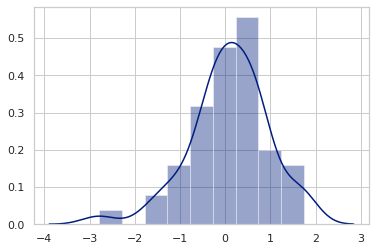

In [ ]:
sns.distplot(data);

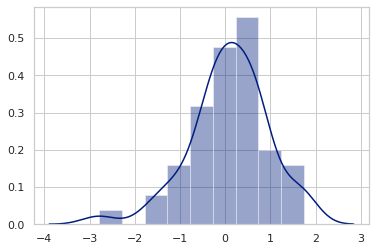

In [ ]:
data = data.reshape(-1,1)
sns.distplot(data);

**Visualizando dados criados**

In [ ]:
print(data)

[[ 0.06483081]
 [ 0.89997452]
 [ 0.24872491]
 [-0.15129613]
 [-0.04337781]
 [ 1.6922801 ]
 [ 0.68062985]
 [ 0.74777868]
 [ 0.94248785]
 [ 0.2712751 ]
 [ 0.64261509]
 [-1.24717058]
 [-0.4593563 ]
 [-0.33733619]
 [ 1.7430821 ]
 [-2.79105253]
 [ 0.23396473]
 [ 0.50548668]
 [-0.11931949]
 [ 1.10585992]
 [-0.49254643]
 [-0.62632603]
 [ 0.14216526]
 [-0.15804428]
 [ 0.29582654]
 [ 0.66144059]
 [ 0.6297181 ]
 [-0.15302181]
 [-0.37011219]
 [-0.03080788]
 [ 0.50157267]
 [ 0.1868106 ]
 [ 1.56229952]
 [ 0.51772962]
 [ 0.14006593]
 [ 1.6433459 ]
 [ 0.29451078]
 [-0.11152207]
 [-0.34431978]
 [ 0.07211554]
 [-0.3759589 ]
 [-0.97199587]
 [ 0.68807807]
 [ 0.7768508 ]
 [-0.37146897]
 [-1.68347391]
 [-1.10547105]
 [-0.78810235]
 [ 0.7120094 ]
 [-1.44096876]]


**Criando objeto standartization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)

**Reescalando os dados**

In [ ]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[-0.02753522]
 [ 0.93953892]
 [ 0.18540924]
 [-0.27780444]
 [-0.15283791]
 [ 1.85700763]
 [ 0.68554364]
 [ 0.76330019]
 [ 0.98876822]
 [ 0.21152177]
 [ 0.64152357]
 [-1.54679782]
 [-0.6345299 ]
 [-0.49323386]
 [ 1.915835  ]
 [-3.33457191]
 [ 0.16831735]
 [ 0.48273253]
 [-0.24077635]
 [ 1.17794872]
 [-0.67296318]
 [-0.82787639]
 [ 0.06201602]
 [-0.28561862]
 [ 0.23995168]
 [ 0.66332299]
 [ 0.6265892 ]
 [-0.27980274]
 [-0.5311876 ]
 [-0.13828226]
 [ 0.47820021]
 [ 0.11371413]
 [ 1.7064936 ]
 [ 0.49690952]
 [ 0.05958505]
 [ 1.80034314]
 [ 0.23842806]
 [-0.23174714]
 [-0.50132067]
 [-0.01909969]
 [-0.53795794]
 [-1.22815284]
 [ 0.69416848]
 [ 0.79696494]
 [-0.53275872]
 [-2.05202543]
 [-1.38271353]
 [-1.01520905]
 [ 0.72188032]
 [-1.77121094]]


**Visualizando a nova distribuiçao**

Veja que a única coisa que alterou foi a escala dos dados, mas dessa vez não está limitado a 0 e 1.

A distribuição ainda é a mesma.

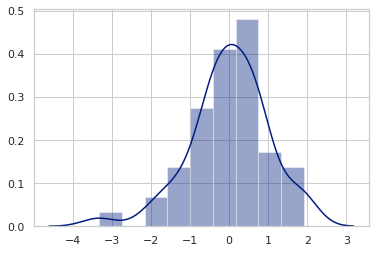

In [ ]:
data_scaled = data_scaled.reshape(-1,1)
sns.distplot(data_scaled);

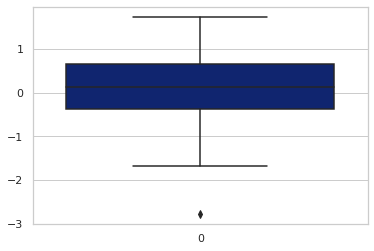

In [ ]:
sns.boxplot(data=data);

# 6. Aplicando a padronização a dados reais

**Carregando a base de dados**

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", sep=",")

In [ ]:
df.head(3)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


**Visualizando o tamanho dos dados**

In [ ]:
df.shape

(177, 14)

**Definindo o nome das colunas**

In [ ]:
df.columns = [ 'Class'
              ,'alcohol'
             ,'malicAcid'
             ,'ash'
            ,'ashalcalinity'
             ,'magnesium'
            ,'totalPhenols'
             ,'flavanoids'
             ,'nonFlavanoidPhenols'
             ,'proanthocyanins'
            ,'colorIntensity'
             ,'hue'
             ,'od280_od315'
             ,'proline'
             ]

**Visualizando os dados com as novas colunas**

In [ ]:
df.head()

,Class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


**Visualizando se os dados estão iguais**

In [ ]:
df.shape

(177, 14)

**Descrição da base de dados**

Veja no minimo e máximo como os valores são discrepantes. Isso irá influenciar no resultado final do modelo.

In [ ]:
df.describe()

,Class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Verificando os tipos dos dados**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Class                177 non-null    int64  
 1   alcohol              177 non-null    float64
 2   malicAcid            177 non-null    float64
 3   ash                  177 non-null    float64
 4   ashalcalinity        177 non-null    float64
 5   magnesium            177 non-null    int64  
 6   totalPhenols         177 non-null    float64
 7   flavanoids           177 non-null    float64
 8   nonFlavanoidPhenols  177 non-null    float64
 9   proanthocyanins      177 non-null    float64
 10  colorIntensity       177 non-null    float64
 11  hue                  177 non-null    float64
 12  od280_od315          177 non-null    float64
 13  proline              177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


**Vamos verificar quais os valores da classe**

In [ ]:
df['Class'].unique()

array([1, 2, 3])

**Verificando contagem da classe**

In [ ]:
df['Class'].value_counts()

2    71
1    58
3    48
Name: Class, dtype: int64

**Separando os dados que iremos padronizar**

Por fins didáticos não iremos utilizar toda a base, isso ajudará na visualização

In [ ]:
df_sub = df[['proline','alcohol','malicAcid','magnesium','flavanoids']]

**Visualizando graficamente os dados**

Olhe o quanto esses dados estão discrepantes

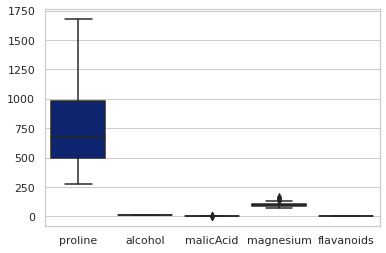

In [ ]:
import seaborn as sns
ax=sns.boxplot(data=df_sub);

**Visualizando a descrição dos dados selecionados**

In [ ]:
df_sub.describe()

,proline,alcohol,malicAcid,magnesium,flavanoids
count,177.000000,177.000000,177.000000,177.000000,177.000000
mean,745.096045,12.993672,2.339887,99.587571,2.023446
std,314.884046,0.808808,1.119314,14.174018,0.998658
min,278.000000,11.030000,0.740000,70.000000,0.340000
25%,500.000000,12.360000,1.600000,88.000000,1.200000
50%,672.000000,13.050000,1.870000,98.000000,2.130000
75%,985.000000,13.670000,3.100000,107.000000,2.860000
max,1680.000000,14.830000,5.800000,162.000000,5.080000


**Vamos visualizar a distribuição por feature antes de prosseguir**

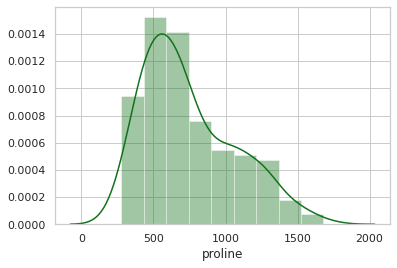

In [ ]:
# proline
sns.distplot(df_sub.proline, color='g');

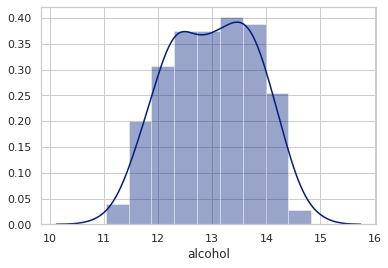

In [ ]:
# alcohol
sns.distplot(df_sub.alcohol);

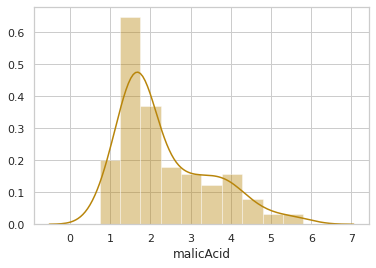

In [ ]:
# malicAcid
sns.distplot(df_sub.malicAcid, color='y');

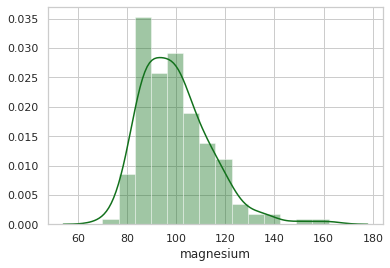

In [ ]:
# magnesium
sns.distplot(df_sub.magnesium, color='g');

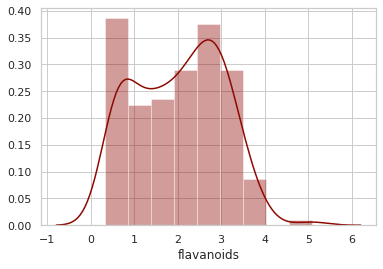

In [ ]:
# flavanoids
sns.distplot(df_sub.flavanoids, color='r');

### StandardScaler

**Importando o StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

**Criando objeto e tranformando os dados**

In [ ]:
obj_std = StandardScaler().fit(df)
df_std = obj_std.transform(df)
print(df_std)

[[-1.22246766  0.2558245  -0.50162433 ...  0.40709978  1.13169801
   0.97105248]
 [-1.22246766  0.20622873  0.01802001 ...  0.3195674   0.80457911
   1.40099798]
 [-1.22246766  1.70650069 -0.34931478 ... -0.4244579   1.20281081
   2.34050852]
 ...
 [ 1.36887097  0.34261709  1.73822194 ... -1.60614514 -1.48525319
   0.28632445]
 [ 1.36887097  0.21862767  0.22408586 ... -1.56237895 -1.39991783
   0.30224836]
 [ 1.36887097  1.40892609  1.57695301 ... -1.51861275 -1.42836295
  -0.58949046]]


**Plotando a nova distribuição dos dados**

Pronto! Nossos dados estão todos na mesma escala.

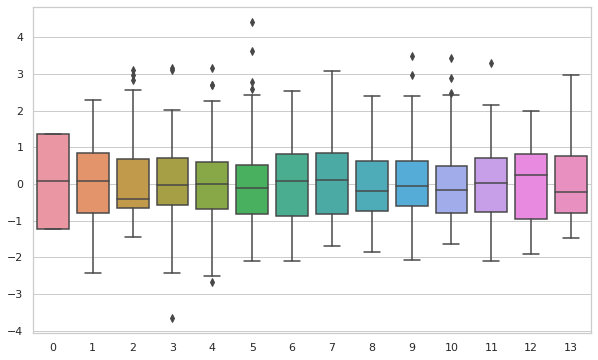

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_std);

**Transformando em DataFrame e visualizando a descrição dos dados**

In [ ]:
df_std = pd.DataFrame(df_std)
df_std.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02
mean,1.327250e-15,-2.609338e-16,4.252719e-16,-4.378168e-16,-6.410440e-16,-1.028681e-16,-1.279579e-16,1.505387e-16,-5.595022e-16,5.645202e-17,1.568112e-16,6.310081e-16,6.335171e-16,2.389802e-16
std,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00
min,-1.222468e+00,-2.434746e+00,-1.433400e+00,-3.668064e+00,-2.680472e+00,-2.093373e+00,-2.100648e+00,-1.690491e+00,-1.868993e+00,-2.065084e+00,-1.628565e+00,-2.087573e+00,-1.897707e+00,-1.487599e+00
25%,-1.222468e+00,-7.856866e-01,-6.628933e-01,-5.692924e-01,-6.964846e-01,-8.198411e-01,-8.840502e-01,-8.268924e-01,-7.426883e-01,-5.912136e-01,-7.959038e-01,-7.745875e-01,-9.590184e-01,-7.805774e-01
50%,7.320166e-02,6.984037e-02,-4.209899e-01,-2.245039e-02,-5.094986e-03,-1.123234e-01,9.242960e-02,1.069996e-01,-1.795360e-01,-6.483128e-02,-1.617011e-01,1.320404e-02,2.498992e-01,-2.327949e-01
75%,1.368871e+00,8.385748e-01,6.810145e-01,7.066723e-01,5.961134e-01,5.244425e-01,8.127835e-01,8.400546e-01,6.249672e-01,6.370119e-01,4.940731e-01,7.134631e-01,8.045791e-01,7.640417e-01
max,1.368871e+00,2.276852e+00,3.100048e+00,3.149233e+00,3.151249e+00,4.415790e+00,2.541633e+00,3.069345e+00,2.394874e+00,3.497023e+00,3.427800e+00,3.295669e+00,1.985052e+00,2.977465e+00


### MinMaxScaler

**Importando o MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

**Visualizando os dados originais**

In [ ]:
df.head(3)

,Class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


**Criando objeto e tranformando os dados**

In [ ]:
obj_norm = MinMaxScaler().fit(df)
norm_df = obj_norm.transform(df)
print(norm_df)

[[0.         0.57105263 0.2055336  ... 0.46341463 0.78021978 0.55064194]
 [0.         0.56052632 0.3201581  ... 0.44715447 0.6959707  0.64693295]
 [0.         0.87894737 0.23913043 ... 0.30894309 0.7985348  0.85734665]
 ...
 [1.         0.58947368 0.69960474 ... 0.08943089 0.10622711 0.39728959]
 [1.         0.56315789 0.36561265 ... 0.09756098 0.12820513 0.40085592]
 [1.         0.81578947 0.66403162 ... 0.10569106 0.12087912 0.20114123]]


**Plotando a nova distribuição dos dados**

Pronto! Nossos dados estão todos na mesma escala e no intervalo de 0 a 1.

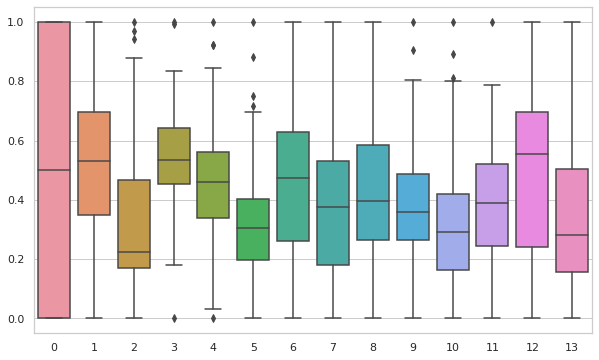

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=norm_df);

**Transformando em DataFrame e visualizando a descrição dos dados**

In [ ]:
norm_df = pd.DataFrame(norm_df)
norm_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.471751,0.516756,0.316183,0.538053,0.459637,0.321604,0.452503,0.355157,0.438333,0.371277,0.322082,0.387791,0.488752,0.333164
std,0.386996,0.212844,0.221208,0.147102,0.171962,0.154065,0.216022,0.210687,0.235194,0.180298,0.198332,0.186289,0.258279,0.224596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.350000,0.169960,0.454545,0.340206,0.195652,0.262069,0.181435,0.264151,0.264984,0.164676,0.243902,0.241758,0.158345
50%,0.500000,0.531579,0.223320,0.534759,0.458763,0.304348,0.472414,0.377637,0.396226,0.359621,0.290102,0.390244,0.553114,0.281027
75%,1.000000,0.694737,0.466403,0.641711,0.561856,0.402174,0.627586,0.531646,0.584906,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 7. Métricas de Desempenho

Já falamos sobre as **métricas** [aqui](https://bit.ly/3nj6EkW), mas... caso queira "evitar a fadiga", transcreverei abaixo:

As métricas servem para ajudar você a, como o próprio já diz, **avaliar o desempenho** do seu algoritmo.

A razão de utilizar diversas métricas é porque algumas delas, a exemplo da acurácia, pode mascarar algum problema na base de dados.

### Métricas mais utilizadas

Serão utilizadas cinco métricas, a primeira vinda da biblioteca Pandas e as outras métricas da sklearn.metrics:

1. **Cross table:**
    * Melhor traduzido como *Matriz de Consufão*, traz de uma forma simples o desempenho do classificador, trazendo o quanto o este acertou ou errou por cada classe.
    
2. **Precision:**
    * Precisão é a razão (divisão) entre as observações positivas previstas corretamente e o total de observações positivas previstas.
  $$
  precisao=\frac{TP}{TP+FP}
  $$
    
3. **Recall:**
    * Também chamada de *Revocação* ou *Sensibilidade*, nos fornece o número de vezes que uma classe foi predita de forma correta, dividida pelo número de classes que contém nos dados.
  $$
  recall=\frac{TP}{TP+FN}
  $$

4. **F1-score:** 
    * Ou *Medida F1*, utiliza a média harmônica entre a precisão e a revocação.
  $$
  F1=2*\frac{precisao*recall}{precisao+recall}
  $$
    * Sendo uma combinação de duas outras métricas, em tese é mais robusta, dando uma informação mais precisa e importante.
    
5. **Accuracy:**
    * A *acurácia* é uma métrica que permite uma visualização geral do classificador.
    * Sua saida é o percentual de classificações corretas pelo classificador.
    * Com classes desbalanceadas não se sai muito bem uma vez que acaba "mascarando" o problema.
    * Accuracy= Número de Predições Corretas/Número total de Predições ou

    
  $$
  accuracy=\frac{TP+TN}{TP+TN+FP+FN}
  $$

**Legenda**
* TP = True Positive (Verdadeiro Positivo)
* TN = True Negativa (Verdadeiro Negativo)
* FP = False Positive (Falso Positivo)
* FN = False Negative (Falso Negativo)
    
**Support:**
* O suporte é o número puro ou real de dados para a classe. Não é uma métrica propriamente dita, mas ajuda por estar junto às outras métricas como o próprio nome diz, dando suporte. 
* Com ele é possível, por exemplo ver se as classes estão desbalançeadas ou não, caso tenha fugido da análise, aqui é uma chance de ser ver isso.

Na nossa **base de dados** iremos dividi-la e depois iremos aplicar o algoritmo **KNN** para depois sim **avaliar seu desempenho**.

**Dividindo em features e classe**

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

**Dividindo em dados de treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**KNN**

In [ ]:
# importação do KNN
from sklearn.neighbors import KNeighborsClassifier
# criando o objeto classificador
knn = KNeighborsClassifier()

In [ ]:
# treinando os dados
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# atribuindo as classificações à variável 'resultados'
y_pred = knn.predict(X_test)
#y_pred e resultados são bem utilizados na literatura

**Checando a métrica *Acurácia***

In [ ]:
# importando a Acurácia
from sklearn.metrics import accuracy_score
# checando a acurácia
score1 = accuracy_score(y_test, y_pred)
score1

0.75

**Voce pode verificar outras métricas [aqui](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)**

**F1 Score**

In [ ]:
# importando o método
from sklearn.metrics import f1_score
# metrificando com 'micro'
f1=f1_score(y_test, y_pred, average='micro')
f1

0.75

In [ ]:
# metrificando com 'weighted'
f1_score(y_test, y_pred, average='weighted')

0.7425983977708116

In [ ]:
# metrificando com 'macro'
f1_score(y_test, y_pred, average='macro')

0.670062695924765

**Matriz de Confusão**

Veja que algoritmo errou pouco na classe 1, piorou na 2 e teve seu pior resultado na classe 3.

Nas métricas avaliaremos cada uma.

In [ ]:
pd.crosstab(y_test, y_pred,rownames=['Real'],colnames=['Predito'],margins=True)

Predito,1,2,3,All
Real,,,,
1,13,0,1,14
2,2,12,2,16
3,0,4,2,6
All,15,16,5,36


**Métricas**

Como falado inicialmente, o fato de se olhar várias métricas é justamente visualizar **se algo está sendo mascarado**.

Os resultados se sairam medianos (em torno de 67 a 75%) porque o algoritmo se saiu muito bem na classe 1 e de forma mediana na classe 2, mas se saiu muito ruim na classe 3, logo o **F1 geral acaba mascarando um pouco isso**, assim como a **Acurácia**.

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.75      0.75      0.75        16
           3       0.40      0.33      0.36         6

    accuracy                           0.75        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.74      0.75      0.74        36



## Cross Validation

Já falamos sobre o Cross Validation [aqui](https://bit.ly/30mKZ1q), mas vou facilitar mais uma vez e trazer para cá.

**Cross Validation** ou **Validação Cruzada**:

Serve para tentar avaliar a capacidade de um modelo em generalizar os dados e deve sempre ser usado em *modelagens preditivas*!

O **cross validation** particiona, ou seja, divide um conjunto de dados em partes (quantidade a ser definida pelo *Cientista de Dados*) menores ou subconjuntos onde, nenhum dado está repetido em nenhum outro subconjunto e o algoritmo utilizará parte dos dados para treinar, parte para testar. 

Exemplo: Se o **K-fold**, ou seja, a quantidade de particionamento dos dados for igual a 5, o algoritmo fará 5 testes e retornará o resultado para cada um deles.
* Teste 1: Treino com subconjuntos 1,2,3 e 4 e teste com o 5.
* Teste 2:Treino com subconjuntos 2,3,4 e 5 e teste com o 1.
* Teste 3: Treino com subconjuntos 1,3,4 e 5 e teste com o 2.
* Teste 4: Treino com subconjuntos 1,2,4 e 5 e teste com o 3.
* Teste 5:Treino com subconjuntos 1,2,3 e 5 e teste com o 4.

Isso mostra um resultado mais fiel do algoritmo, para evitar mascaração de resultados para melhor ou para pior.

**Aplicando o Cross Validation**

Assim como no exemplo acima em que foram feitos **5 testes**, faremos o mesmo no exemplo prático, por isso o parâmetro `cv=5`.

In [ ]:
from sklearn.model_selection import cross_val_score
val_score=cross_val_score(knn,df.drop('Class',axis=1),df['Class'],cv=5)
val_score

array([0.72222222, 0.63888889, 0.65714286, 0.68571429, 0.71428571])

**Cada número acima é um teste feito pelo Cross Validation**

## MSE e RMSE

**MSE significa o erro médio**

Quanto mais próximo de zero, melhor, significa que o erro é menor.

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

0.3333333333333333

**RMSE mede a diferença entre valores reais e preditos**

Significa **Root Mean Square Erro**

* A diferença é chamada de residuo
* Utilizado em regressões
* Utiliza unidades independentes
* O **RMSE** entrega na mesma unidade que os valores usados

In [ ]:
# modo 01 de se obter o RMSE
rmse=mean_squared_error(y_test,y_pred)**0.5
rmse

0.5773502691896257

In [ ]:
# modo 02 de se obter o RMSE
from math import sqrt
rmse_2 = sqrt(mean_squared_error(y_test,y_pred))
rmse_2

0.5773502691896257

## Método dos Mínimos Quadrados

Do ingles **OLS** (do inglês Ordinary Least Squares).

Essa função da [statsmodel](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html) nos permite visualizar alguns dados estatísticos interessantes como **coeficiente**, **erro médio** por features.

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Class   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              603.4
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                   4.35e-131
Time:                        16:39:00   Log-Likelihood:                         -37.611
No. Observations:                 177   AIC:                                      101.2
Df Residuals:                     164   BIC:                                      142.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
alcohol                 0.1560      0.026      6.071      0.000       0.105       0.207
malicAcid               0.0211      0.027      0.783      0.435      -0.032       0.074
ash                    -0.1279      0.126     -1.016      0.311      -0.376       0.121
ashalcalinity           0.0605      0.010      5.978      0.000       0.041       0.081
magnesium               0.0028      0.002      1.459      0.146      -0.001       0.007
totalPhenols            0.1726      0.078      2.217      0.028       0.019       0.326
flavanoids             -0.4347      0.061     -7.073      0.000      -0.556      -0.313
nonFlavanoidPhenols    -0.0061      0.249     -0.024      0.981      -0.497       0.485
proanthocyanins         0.0862      0.057      1.511      0.133      -0.026       0.199
colorIntensity          0.0542      0.017      3.132      0.002       0.020       0.088
hue                     0.1052      0.160      0.658      0.511      -0.210       0.421
od280_od315            -0.2124      0.064     -3.296      0.001      -0.340      -0.085
proline                -0.0010      0.000     -8.862      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.734   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.693   Jarque-Bera (JB):                0.586
Skew:                           0.140   Prob(JB):                        0.746
Kurtosis:                       3.030   Cond. No.                     8.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 8. One Hot Encoder, Label Encoder e Get Dummies

Alguns algoritmos somente trabalham com valores numéricos.


Basicamente funciona assim:
* O **One Label Encoder** transforma os formatos categóricos em numéricos
    * Mas será um problema em algoritmos de distância por simplesmente trocar por um número. 
        * Exemplo: *Daniel*, *Fernanda*, *Leticia*; será transformado em 1, 2, 3. Isso fará com que o algoritmo entenda que o *3* é melhor que o *1*, o que é um problema. Então entra o *One Hot Encoder*.
* O **One Hot Encoder** transforma esses números em *matriz presença* com valor binário (1=presente;0=ausente)
    * No exemplo dos números acima, o *1*, *2*, *3* agora viram colunas onde *Daniel* antes era *1*, agora na *coluna 1* terá o *1* e nas demais será *0*. *Fernanda* que era *2*, terá o *1* na *coluna 2* e *0* na demais.
        Com o exemplo ficará mais fácil de entender.
    * O *One Hot Encoder* não aceita valores categóricos, pelo menos na versão utilizada aqui, por isso se transforma com o *Label Encoder* primeiro.
* O **Get Dummies** faz todo o trabalho de uma vez só, transformando de categórico para numérico e já com a matriz presença.

Agora, claro que você deve estar achando que não faz sentido utilizar outra coisa senão o **Get Dummies**, contudo isso varia em cada problema. 

Haverão problemas em que se precisará somente do **One Hot Encoder**, às vezes somente do **Label Encoder** e, às vezes sua conjugação. Nesse caso tanto faz utilizar a combinação quanto o **Get Dummies**. 

Como sempre digo, cabe ao **Cientista de Dados** avaliar quando utilizar cada um.

**Carregando a base de dados**

In [ ]:
dadoscar=pd.read_csv('/home/amador/dados/base_car.csv')

In [ ]:
dadoscar

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


## Get dummies

In [ ]:
dummies=pd.get_dummies(dadoscar['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


**Rápido assim!**

Vamos atribuir ao DataFrame para visualizar

A exemplo da **linha 0** que era uma **BMW X5**, somente na coluna com seu nome está presente o *1*, ou seja, está *presente*, nas demais está *ausente*, por isso o *0*.

In [ ]:
merged=pd.concat([dadoscar,dummies],axis=1) # pode ser axis=columns
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


**Para finalizar**

Vamos construir a coluna final que irá ser utilizada

* Observação: Ao fazer o get dummies, se **exclui uma das categorias** para evitar o efeito da multicolinearidade.
* Logo se são 3 categorias, tem-se que excluir uma.
* **Multicolinearidade** consiste em um problema comum em regressões, no qual as variáveis independentes possuem relações lineares exatas ou aproximadamente exatas.

Aqui excluimos a *feature* **Audi A5**, além da coluna original com o nome dos carros.

In [ ]:
merged_final=merged.drop(['Car Model','Audi A5'],axis='columns')
merged_final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


## Label Enconder

**Relendo a base de dados original**

In [ ]:
dadoscar.head(3)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5


**Criando o objeto LabelEncoder**

In [ ]:
# importando o LabelEncoder
from sklearn.preprocessing import LabelEncoder
# criando objeto
le=LabelEncoder()

**Transformando os dados**

Veja que agora:
* **BMW X5** é *1*
* **Audi A5** é *0*
* **Mercedez Benz C class** é *2*

In [ ]:
# atribuindo os dados originais a uma variável nova para preservar os originais
dados_le=dadoscar
# atribuindo os dados --> Serão arrays
le.fit_transform(dados_le['Car Model'])

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2])

In [ ]:
# pode ser feito direto, assim:
dados_le=dadoscar
dados_le['Car Model']=le.fit_transform(dados_le['Car Model'])
dados_le['Car Model']

0     1
1     1
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     2
10    2
11    2
12    2
Name: Car Model, dtype: int64

**Visualizando as features já transformadas**

In [ ]:
dados_le

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


## One Hot Encoder

**Transformando em array numpy o dataset**

In [ ]:
dataset_array=dados_le.values
type(dataset_array)

numpy.ndarray

**Pegando o número de linhas**

In [ ]:
num_rows = dataset_array.shape[0] # shape[0] significa pegar o shape (ou tamanho) de linhas
num_rows

13

In [ ]:
dataset_array

array([[    1, 69000, 18000,     6],
       [    1, 35000, 34000,     3],
       [    1, 57000, 26100,     5],
       [    1, 22500, 40000,     2],
       [    1, 46000, 31500,     4],
       [    0, 59000, 29400,     5],
       [    0, 52000, 32000,     5],
       [    0, 72000, 19300,     6],
       [    0, 91000, 12000,     8],
       [    2, 67000, 22000,     6],
       [    2, 83000, 20000,     7],
       [    2, 79000, 21000,     7],
       [    2, 59000, 33000,     5]])

**Visualizando coluna de preços**

In [ ]:
dataset_array[:][:,2]

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000])

**Criando o objeto**

In [ ]:
# importando a biblioteca
from sklearn.preprocessing import OneHotEncoder
# criando o objeto
ohe=OneHotEncoder()

**Pegando os valores da coluna como array e fazendo reshape na dimensão 13x1**

In [ ]:
# pegando os valores da coluna como array
col_array=dados_le['Car Model'].values
# fazendo reshape na dimensão 13x1
inteiros = col_array.reshape(len(col_array),1)

In [ ]:
inteiros.shape

(13, 1)

**Imprimindo inteiros para observar a forma dos dados**

In [ ]:
inteiros

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2]])

**Criando as novas features a partir da matriz de presença**

In [ ]:
novas_features = ohe.fit_transform(inteiros)

**Imprimindo as novas features**

In [ ]:
novas_features

<13x3 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

**Visualizando o tipo das novas features**

In [ ]:
type(novas_features)

scipy.sparse.csr.csr_matrix

**Concatenando as novas features ao array em formato array**

In [ ]:
dataset_array = np.concatenate([dataset_array, novas_features.toarray()], axis=1)

**Visualizando o tamanho do dataset criado**

In [ ]:
dataset_array.shape

(13, 7)

**Transformando em DataFrame e visualiza as colunas**

In [ ]:
dataf = pd.DataFrame(dataset_array)

**Visualizando o DataFrame final**

In [ ]:
dataf.head(13)

,0,1,2,3,4,5,6
0,1.0,69000.0,18000.0,6.0,0.0,1.0,0.0
1,1.0,35000.0,34000.0,3.0,0.0,1.0,0.0
2,1.0,57000.0,26100.0,5.0,0.0,1.0,0.0
3,1.0,22500.0,40000.0,2.0,0.0,1.0,0.0
4,1.0,46000.0,31500.0,4.0,0.0,1.0,0.0
5,0.0,59000.0,29400.0,5.0,1.0,0.0,0.0
6,0.0,52000.0,32000.0,5.0,1.0,0.0,0.0
7,0.0,72000.0,19300.0,6.0,1.0,0.0,0.0
8,0.0,91000.0,12000.0,8.0,1.0,0.0,0.0
9,2.0,67000.0,22000.0,6.0,0.0,0.0,1.0


**Renomeando as colunas do dataf**

In [ ]:
dataf.columns=['Car Model','Mileage','Sell Price($)','Age(yrs)','car1','car2','car3']

**Visualizando dataf**

In [ ]:
dataf.head()

,Car Model,Mileage,Sell Price($),Age(yrs),car1,car2,car3
0,1.0,69000.0,18000.0,6.0,0.0,1.0,0.0
1,1.0,35000.0,34000.0,3.0,0.0,1.0,0.0
2,1.0,57000.0,26100.0,5.0,0.0,1.0,0.0
3,1.0,22500.0,40000.0,2.0,0.0,1.0,0.0
4,1.0,46000.0,31500.0,4.0,0.0,1.0,0.0


**Dropando o car model**

In [ ]:
dataf.drop(['Car Model'],axis=1,inplace=True)
dataf

,Mileage,Sell Price($),Age(yrs),car1,car2,car3
0,69000.0,18000.0,6.0,0.0,1.0,0.0
1,35000.0,34000.0,3.0,0.0,1.0,0.0
2,57000.0,26100.0,5.0,0.0,1.0,0.0
3,22500.0,40000.0,2.0,0.0,1.0,0.0
4,46000.0,31500.0,4.0,0.0,1.0,0.0
5,59000.0,29400.0,5.0,1.0,0.0,0.0
6,52000.0,32000.0,5.0,1.0,0.0,0.0
7,72000.0,19300.0,6.0,1.0,0.0,0.0
8,91000.0,12000.0,8.0,1.0,0.0,0.0
9,67000.0,22000.0,6.0,0.0,0.0,1.0


**Cansou???**

Pois é, o *One Hot Encoder* é um pouco mais trabalhoso, então se for para utilizá-lo após o *Label Encoder*, use o *Get Dummies* diretamente.

# 9. Pipelines

**Por fim!!!**

Sei que já me prolonguei muito, mas cada arma no seu Arsenal te dará uma maior chance, correto?!

Os **Pipelines** são **automatizações** nos processos de **Machine Learning**, permitindo que processe (transforme) e treine modelos, em vários formatos, bem mais rapidamente.

Os **Pipelines** permitem uma melhor **produtividade**, além de **facilitar** na hora de validar o modelo, além de **minimizar** os erros na hora de manipular os dados de `treino` e `teste`.


### $$Sigamos!!!$$

**Importando:**
* **Pipeline**
* **Pré-processadores** que usaremos (StandardScaler, MinMaxScaler)
* **Algoritmos** que usaremos (KNeighborsClassifier e svm)

In [ ]:
# importação do pipeline, processadores e algoritmos knn e svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

**Visualizando os dados de treino (features)**

In [ ]:
X_test

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
95,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.950,2.26,625
116,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.060,2.96,345
19,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.090,3.71,780
69,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870
53,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.920,3.20,1060
153,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.580,1.55,640
120,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.930,3.69,465
14,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.280,2.88,1310
102,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.940,2.44,415
106,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.880,2.42,488


**Visualizando os dados de treino (classe)**

In [ ]:
y_test

95     2
116    2
19     1
69     2
53     1
153    3
120    2
14     1
102    2
106    2
11     1
4      1
107    2
42     1
114    2
112    2
151    3
35     1
125    2
31     1
51     1
75     2
171    3
73     2
40     1
85     2
47     1
29     1
16     1
110    2
155    3
158    3
150    3
5      1
97     2
91     2
Name: Class, dtype: int64

**Criando os Pipelines**

Veja como é fácil, cada pipeline está recebendo um **pré-processador** e um **algoritmo**.

In [ ]:
# criando pipelines

pip_ss = Pipeline([('scaler', StandardScaler()),
                    ('KNN', KNeighborsClassifier())
                   ])

pip_minmax = Pipeline([('minmax', MinMaxScaler()),
                       ('KNN', KNeighborsClassifier())
                      ])

pip_ss_svm = Pipeline([('scaler', StandardScaler()),
                       ('SVM', svm.SVC())
                      ])
pip_minmax_svm = Pipeline([('minmax', MinMaxScaler()),
                       ('SVM', svm.SVC())
                      ])

**Agora é só executar os pipelines passando os dados de `treino` e `teste`**

In [ ]:
pip_ss.fit(X_train, y_train)
pip_minmax.fit(X_train, y_train)
pip_ss_svm.fit(X_train, y_train)
pip_minmax_svm.fit(X_train, y_train)


Pipeline(steps=[('minmax', MinMaxScaler()), ('SVM', SVC())])

**Visualizando os scores**

O `score` é um método do próprio *pipeline*

In [ ]:
pip_ss.score(X_test, y_test)

0.9722222222222222

In [ ]:
pip_minmax.score(X_test, y_test)

0.9722222222222222

In [ ]:
pip_ss_svm.score(X_train, y_train)

1.0

In [ ]:
pip_minmax_svm.score(X_train, y_train)

1.0

**Você encontrará outros métodos do pipeline [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) caso tenha interesse**

**Visualizando os dados da variável *df* para finalizar**

In [ ]:
df.values

array([[1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.000e+00, 1.437e+01, 1.950e+00, ..., 8.600e-01, 3.450e+00,
        1.480e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).

[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-purple.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-yellow.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-darkblue.svg)](https://daniel-s-amador.medium.com/)



<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>